# Preliminary results 

## Introduction

Much of the previous theoretical work that has been done on the genetic effects of artificial propogation on natrual popualtions has focused on the long-run or equilibrium effects. However, not all artificial propogation programs are intended to be perminent. Instead they may be used as temporary measures to supliment recovering populations or to allow a popualtion to persist while other conservaiton measures are implemented. The Nechako River Sturgeon hatchery program falls into this later category. The objectives of the program are to maintain the populaiton of White Sturgeon in the Nechako river which is experincing a recruitment failure unitl conditions can be restored that will allow natural recruitment. 

Hatchery programs can be categorized into two groups, integrated and segregated. Intrgrated programs seek to increase reproduction in a population by breeding some individuals in captivity, before releaseing them and thier progeny back into the neutral populaiton. The goal of segregated programs is to create a seperate popualtion this is maintianed by artificial propogation, where all reproduction occurs in captivity. Both of these types of programs can have genetic effects on natrual popualtions. Integrated programs may cause tha natural popualtion to adapt to the captive breading environment through a process called domestication, making it less able to reproduce natrually. Segregated programs can have genetic effects if individuals from the captive breed popuatlion stray/immigrate to a natrual popualtion. This gene flow can introduce traits that are disadvantageous to the natraul population, either because the captive breed popuatlion does not have local adaptations that are present in the natrual popualtion or becasue the captive breed individuals have adaptation to the captive environment that are deleterious in the natrual environment. 

The Nechakor river hatchery program has both of these characteristics. On paper it is an integrated program desiged to supliment the population in the Nechako River. However, captivre breed individuals from this program immigate at a higher than expected rate to the mainstem of the Fraser River where there is a distinct sub-popualtion.  The effects of these immigrating individuals can be though of in similar terms to individuals in a segeragated program that stray into a natural popualtion.  In my initial analysis I Have focus on the genetic effects of these migrating individuals and the effectiveness of measures desiged to mitigate these impacts. 

To do this I am using a genetic demograohic model with couples a demographic model of the sturgeon populations to a model of a fitness associated quantitative genetic trait. The demographic model parameters are set to match previous stock assesments for these populations (e.g. Smyth 2016). The genetic paramters of the model are unknwon. To deal with this limitation I consider a range of possible values and although I focus my attention on cases where the differences are large enough for the hatchery program to have a deleterious effect. Finally, the model requires informaiton about the rate at which hatchery raised individuals migrate to the main stem population. I also assume that all of the genetic differnces between the immigrants and the main stem popualtion are a result of differnt local adaptations and ignore changs in genetic state in the hatchery popualtion caused by local adapation. I again consider a range of value of this paramter and pay special interet into its effect on the outcome because 1) it is not know with certianty and 2) this rate can be controled by limiting the number of hatchery fish released and by removing the ones that do immigrate.  

### Parameters

$RRS$ - Fitness of immigrants reletive to natrual born individuals 

$s$ - selection strength 

$p_{im}$ - rate of immigration reletive to natural recruitment

$k$ - Growth rate when populaiton is small

## Time series of short term stocking 

In the following block of code I initalize the genetic demographic model and plot a time series that shows the effect of the stocking program on the abundace, fitness and genetic state of the population. 

3.895010388667643

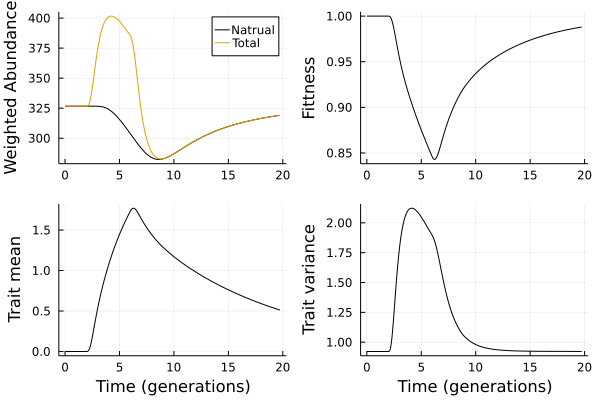

In [167]:
include("AgeStructuredModels.jl")
include("DemographicParameters.jl")
include("AgeTraitStructuredModels.jl")
include("StockRecruitCurves.jl")
using Plots
theme(:wong2)

#####  initialize demographic model #####
mod = DemographicParameters.mod_Smyth_2016
Rstar = AgeStructuredModels.compute_Rstar(mod)
k = 3.1

# set base genetic paramters
Vle = 1.0
θ = 0.0
s = 0.1

# grid for aproximating the trait distribution
min = -5
max = 20 
Δz = 0.15

# Genetic differnce and immigation rate 
RRS = 0.5
μ_im = AgeTraitStructuredModels.solve_trait_difference(RRS,s)
print(μ_im )
p_im = 0.25 # immigraiton reletive to recruitment rate 
R_im = p_im * Rstar 

# initialize coupled genetic-demogrpahic model 
pop = AgeTraitStructuredModels.init(mod,Vle, θ, s, min, max, Δz)
StockRecruitCurves.update_BevetonHolt_k!(pop.ageStructure.SRCurve, k)
im = AgeTraitStructuredModels.init_imigrants(pop, R_im, μ_im)


##### simulation  #####
# set time frame 
T = 1000
t_stock = 100 # begin stocking
T_stock = 300 # end stocking 

# set ccumulators 
fittness = zeros(T)
SSBN = zeros(T)
SSBH = zeros(T)

mu, sigma = zeros(T), zeros(T)
F = 0.0
# loop over T years 
for t in 1:T 
    if t < t_stock # w/o immigration 
        AgeTraitStructuredModels.time_step_DSI!(pop)
    elseif t < T_stock # w immigration 
        AgeTraitStructuredModels.time_step_DSI!(pop,im)
    else # w/o immigration 
        AgeTraitStructuredModels.time_step_DSI!(pop)
    end 
    # add to accumulator
    fittness[t] = AgeTraitStructuredModels.fittness(pop)
    SSBN[t] = AgeTraitStructuredModels.spawning_stock(pop)
    SSBH[t] = AgeTraitStructuredModels.spawning_stockH(pop)
    mu[t], sigma[t] = AgeTraitStructuredModels.trait_moments_born(pop)
end 

### plot results ####
time = collect(1:T) ./ DemographicParameters.Smyth_2016_T1
# fitness
p1 = Plots.plot(time, fittness ./fittness[1] , ylab = "Fittness", label = "")
# abundnace
p2 = Plots.plot(time,SSBN, ylab = "Weighted Abundance",label = "Natrual")
Plots.plot!(p2,time,SSBN .+ SSBH, ylab = "Weighted Abundance", label = "Total",legend =:topright)
# trait mean and varaince 
p3 = Plots.plot(time,mu, ylab = "Trait mean", xlab = "Time (generations)", label = "")
p4 = Plots.plot(time,sigma.^2, ylab = "Trait variance", xlab = "Time (generations)", label = "")
# print plots
plot(p2,p1,p3,p4, layout = (2,2))

### Time series results

Immigrants from the hatchery program cause changes in the abundace fitness and genetic state of the natrual population. The inital effect of stocing is to increase the total abundace of the popualtion, but over time stocking can cause the population to decline if genetic effects are strong enough, becuase fitness declines. when stocking is stopped the abundace of the population declines rapidle to a minimum level and then begins to recover slowly and the genetic state of the popualtion returns to the original state. Interstigly the genetic variance in the population increases substantially. This happend because the geneflow from the immigrants creates a positive correlation between allels with similar effects on the trait value also known as linkage disequilibrium. This ends up impacting the dynamics of the population in important ways.  



## Relationshp between immigration rate and equilibrium 

The primary goal of this docuemnt is to understnad the effects of temporary / short term stocking programs. However, it is useful to compare these results to the long term dynamics of the system to understand when differnces emerge between the short and long run. In particular my goal here is to demonstrate the effect of immigation rate on the equilibrium fitness of the population, and how this relationship is modified by some key genetic and demographic paramters in the model. 

The next code block defines a function to generate a bifrucation diagram over a range of the immigraiton rate paramter. 


In [209]:
function bifrucation(pop, max_pim, RRS, s, k; maxiter = 100000, max_step_size = 10^-3, min_step_size = 10^-4.5)
    conditions = 1
    # update recruitment paramter
    StockRecruitCurves.update_BevetonHolt_k!(pop.ageStructure.SRCurve, k)
    # Update selection strength 
    AgeTraitStructuredModels.reset!(pop,s)
    # Get recruitment rate
    Rstar = AgeStructuredModels.compute_Rstar(pop.ageStructure)
    # set trait difference 
    μ_im = AgeTraitStructuredModels.solve_trait_difference(RRS,s)
    # update immigrants
    im =AgeTraitStructuredModels.init_imigrants(pop, 0.0, μ_im)
    
    # fitness 
    Wlag = AgeTraitStructuredModels.fittness(pop) + 1.0
    W = AgeTraitStructuredModels.fittness(pop)
    
    # initial imigration rate 
    pim = 0
    step_size = 1.0 
    # count interations 
    iter = 0
    flip = 0
    Wacc = zeros(100000)
    Pacc = zeros(100000)
    step_size_acc = zeros(100000)
    while conditions  == 1
        iter += 1
        
        Rim = pim*Rstar
        
        # update iigrants 
        AgeTraitStructuredModels.update_im!(im, pop, Rim, μ_im)
        
        # update population  
        AgeTraitStructuredModels.time_step_DSI!(pop, im)
        
        # update lags 
        Wlag = W

        # fitness
        W = AgeTraitStructuredModels.fittness(pop)
        
        # step size
        dWdp = (W - Wlag) / step_size
        if dWdp > 0
            step_size = max_step_size*dWdp^2/(1 + dWdp^2) + min_step_size
        else
            step_size = min_step_size
        end
        
   
        if flip == 0
            pim += step_size
        else
            pim += -1*step_size
        end 
        

        # end conditions
        if (pim > max_pim) & (flip == 0)
            flip = 1
        end 
        
        conditions = 1
        conditions *= (iter < maxiter)
        conditions *= (pim >= 0.0)
        Wacc[iter] = W
        Pacc[iter] = pim
        step_size_acc[iter] = step_size
    end 
    return Pacc, Wacc, step_size_acc
end 


bifrucation (generic function with 1 method)

In [211]:
#pim,W, ss = bifrucation(pop, 2.0, 0.5, 0.1, 3.0)
p1 = Plots.plot(pim,W)
p2 = Plots.plot(ss)
plot(p1,p2)

## Effect of program duration and immigration rate on minimum fitness 

## Removal rates

## Trade off between populations

## Add domestication process 

## Normal forms analysis 



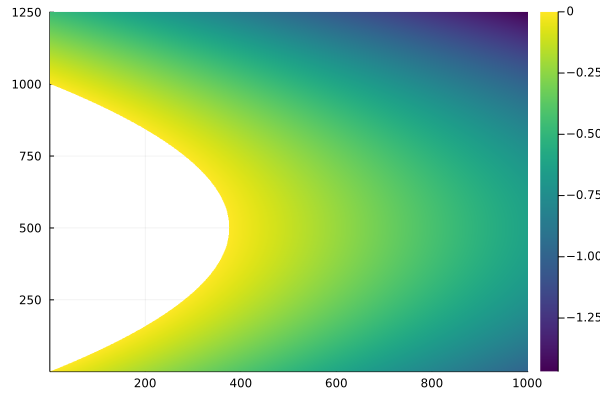

In [137]:
using Plots
theme(:wong2)
dB(B,H, r) = r*B*(1-B) - H
B = 0.0:0.001:1.25
H = 0.0:0.001:1.0
acc = zeros(length(B), length(H))
    
i = 0
for b in B
    i += 1
    j = 0
    for h in H
        j+= 1
        v = dB(b,h,1.5)
        if v < 0
            acc[i,j] = v
        else
            acc[i,j] = NaN
        end
    end
end
Plots.heatmap(acc)

In [129]:
c(r,H) = 2/sqrt(r*(4*H-r)) *atan(sqrt(r)/sqrt(4*H-r))
        
T_(r,H) = -2/sqrt(r*(4*H-r)) *atan(-sqrt(r)/sqrt(4*H-r)) + c(r,H) 

Bt(t,r,H) = 0.5*(sqrt((4*H-r)/r)*tan(  sqrt(r*(4*H-r))/2  *(-t+c(r,H)))+1)

Bt (generic function with 1 method)

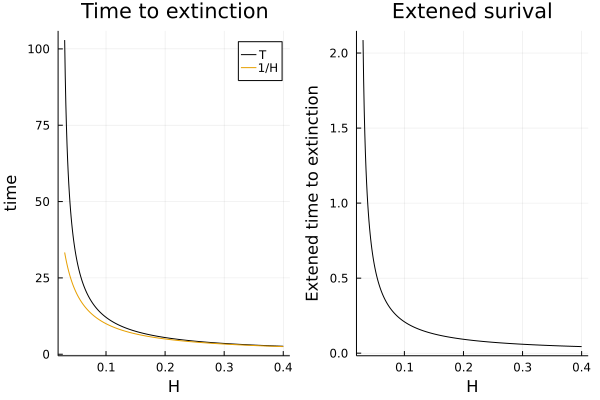

In [147]:
r = 0.1
Hls = (r/4 + 0.05*r):0.001:(4*r)
p1 = Plots.plot(Hls,broadcast(x -> T_(r,x),Hls), label = "T", title = "Time to extinction", 
    ylab = "time", xlab = "H")
Plots.plot!(p1,Hls,1 ./Hls, label = "1/H")
p2 = Plots.plot(Hls,broadcast(x -> T_(r,x),Hls).*Hls .- 1, label = "", title = "Extened surival", 
    xlab = "H", ylab = "Extened time to extinction")
plot(p1,p2)